In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

cwd = os.getcwd()
date_format = "%Y-%m-%d"
INTERSECTION_PATH = os.path.join(cwd, "..", "data/tornadoes_and_counties_new.csv")
data_tornado = pd.read_csv(INTERSECTION_PATH)

In [190]:
#num tornados with negative magnitude (unknown)
np.sum(data_tornado['mag']<0)

796

In [191]:
# num tornados with 0 property loss
# (does NOT mean no property damage, just that it was not reported)
np.sum(data_tornado['loss'] == 0)

28910

In [192]:
np.count_nonzero(data_tornado['loss'])

49618

Text(0.5, 1.0, 'Histogram of Property Loss')

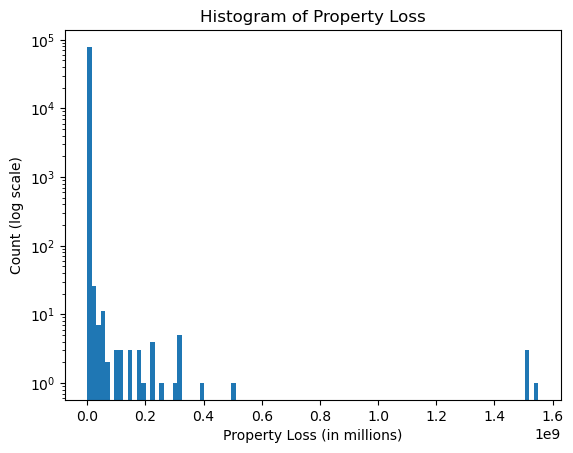

In [193]:
plt.hist(data_tornado['loss'], log=True, bins=100)
plt.xlabel('Property Loss (in millions)')
plt.ylabel('Count (log scale)')
plt.title('Histogram of Property Loss')

<Axes: xlabel='loss'>

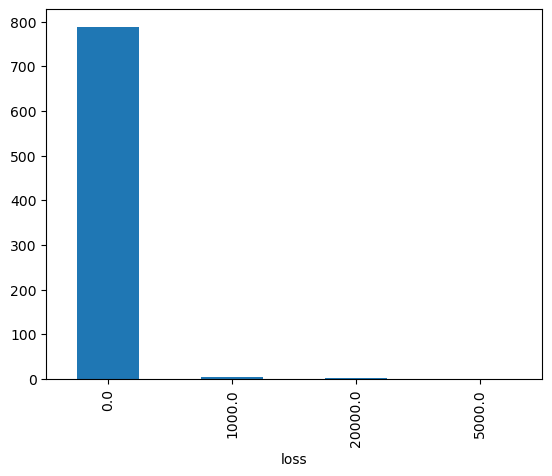

In [194]:
# tornadoes with unknown magnitude and their loss values
unknowns = data_tornado[data_tornado['mag'] == -9]
unknowns['loss'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Histogram of Crop Loss')

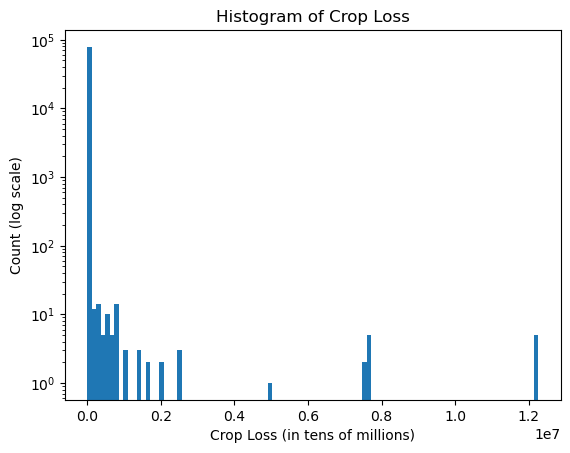

In [195]:
plt.hist(data_tornado['closs'], log=True, bins=100)
plt.xlabel('Crop Loss (in tens of millions)')
plt.ylabel('Count (log scale)')
plt.title('Histogram of Crop Loss')

Text(0.5, 1.0, 'Histogram of Fatalities')

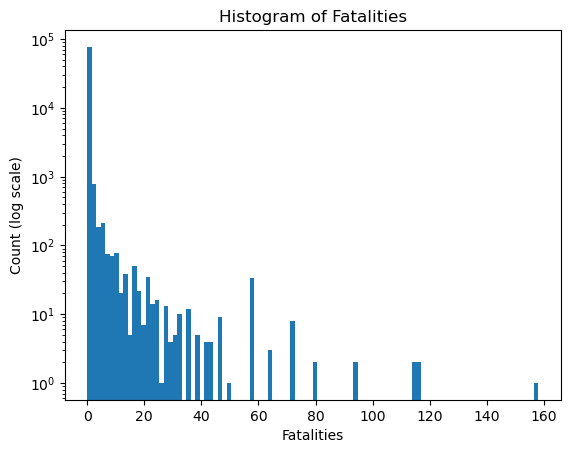

In [196]:
plt.hist(data_tornado['fat'], log=True, bins=100)
plt.xlabel('Fatalities')
plt.ylabel('Count (log scale)')
plt.title('Histogram of Fatalities')

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]),
 [Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

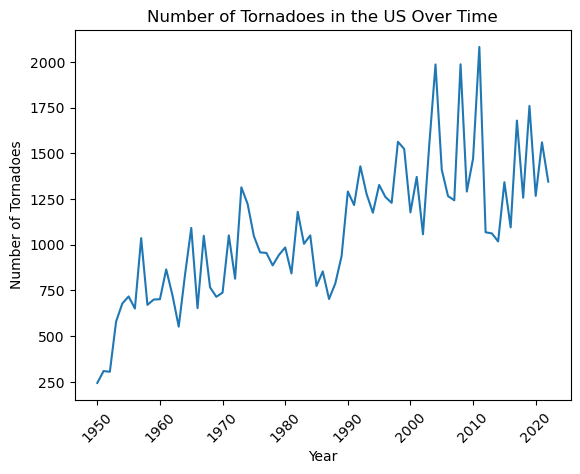

In [197]:
#tornadoes over time
tornadoes_by_year = data_tornado['yr'].value_counts().sort_index()
# print(tornadoes_by_year)
plt.plot(tornadoes_by_year.index, tornadoes_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Number of Tornadoes in the US Over Time')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Number of Tornadoes per month in the US')

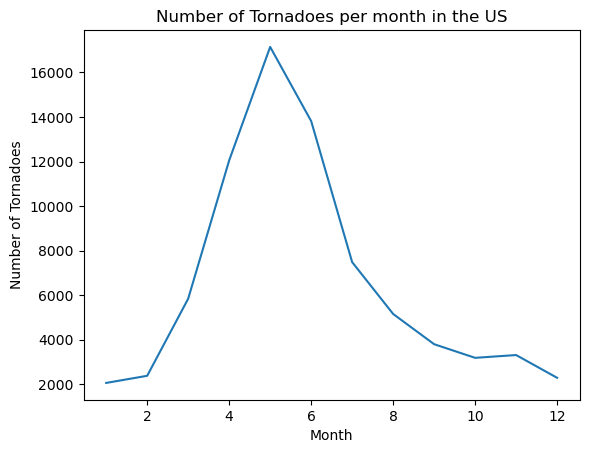

In [198]:
#tornadoes by month
tornadoes_by_month = data_tornado['mo'].value_counts().sort_index()
plt.plot(tornadoes_by_month.index, tornadoes_by_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Tornadoes')
plt.title('Number of Tornadoes per month in the US')

In [199]:
#get total number of tornadoes per month
date_tornado_copy = data_tornado.copy()
date_tornado_copy['date'] = pd.to_datetime(data_tornado['date'], format=date_format)
data_tornado_monthly = date_tornado_copy.set_index('date').resample('ME').size()

In [200]:
data_tornado_monthly

date
1950-01-31     9
1950-02-28    34
1950-03-31    28
1950-04-30    16
1950-05-31    67
              ..
2022-08-31    37
2022-09-30    26
2022-10-31    36
2022-11-30    77
2022-12-31    67
Freq: ME, Length: 876, dtype: int64

In [201]:
#number of years covered
num_years = data_tornado['yr'].nunique()
num_years

73

In [202]:
#get average number of tornadoes per month
avg_num_tornadoes_per_month = data_tornado.groupby('mo').size() / num_years
avg_num_tornadoes_per_month


mo
1      28.246575
2      32.630137
3      80.027397
4     165.068493
5     234.835616
6     189.246575
7     102.520548
8      70.643836
9      52.054795
10     43.671233
11     45.383562
12     31.397260
dtype: float64

<Axes: xlabel='date'>

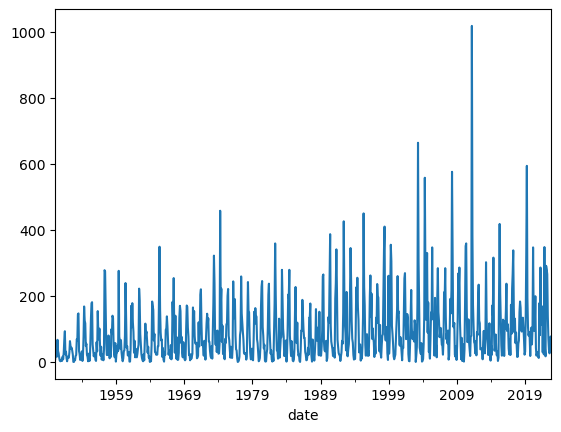

In [203]:
data_tornado_monthly.plot()

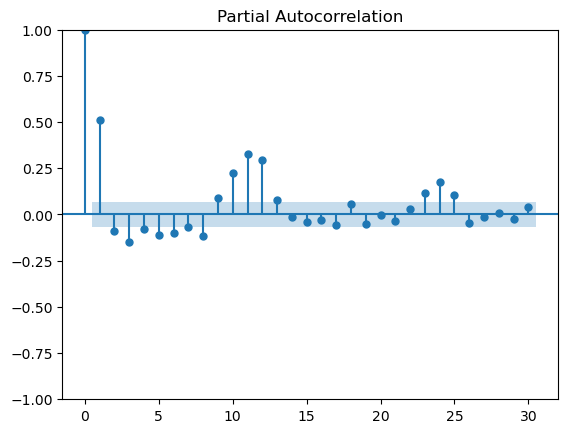

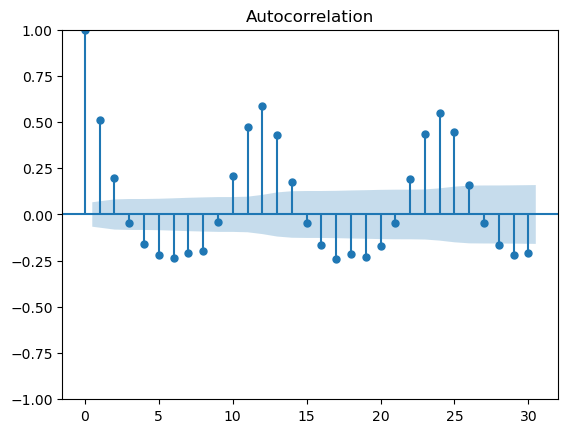

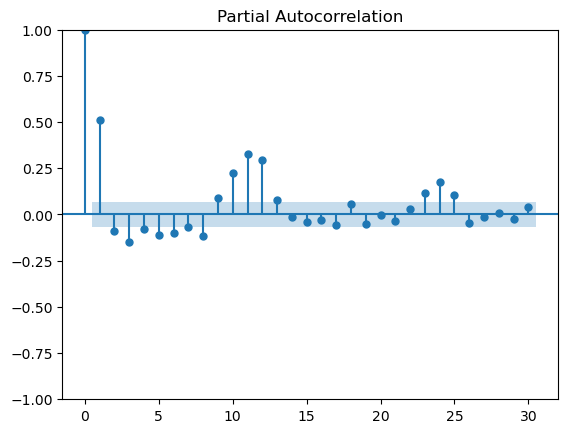

In [204]:
#plot the acf and pacf of the number of tornadoes per month
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_tornado_monthly)
plot_pacf(data_tornado_monthly)


In [205]:
import scipy.interpolate as spi

x = avg_num_tornadoes_per_month.index.astype(int)
y = avg_num_tornadoes_per_month.values

#artificially moving the first value to the end to make the interpolation smoother
y[-1] = y[0]
P = spi.CubicSpline(x, y, bc_type='periodic')
plotting_x = np.linspace(0, 24, 100)


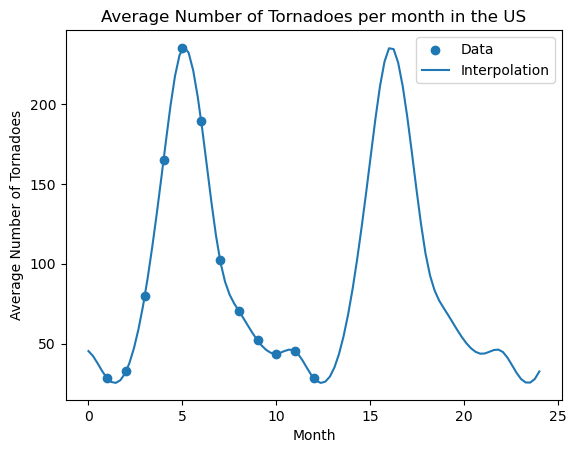

In [206]:
plt.scatter(avg_num_tornadoes_per_month.index, avg_num_tornadoes_per_month.values)
plt.plot(plotting_x, P(plotting_x))
plt.xlabel('Month')
plt.ylabel('Average Number of Tornadoes')
plt.title('Average Number of Tornadoes per month in the US')
plt.legend(['Data', 'Interpolation'])

In [207]:
data_tornado_monthly

date
1950-01-31     9
1950-02-28    34
1950-03-31    28
1950-04-30    16
1950-05-31    67
              ..
2022-08-31    37
2022-09-30    26
2022-10-31    36
2022-11-30    77
2022-12-31    67
Freq: ME, Length: 876, dtype: int64

In [208]:
data_tornado_monthly.size

876

In [209]:
samples = np.arange(1, data_tornado_monthly.size+1)

In [210]:
#de-periodize the data
# treat 1 as January
data_tornado_monthly_deperiodized = data_tornado_monthly - P(samples % 12)

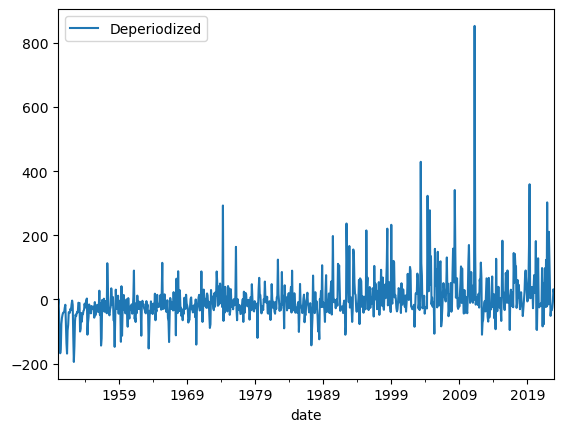

In [211]:
data_tornado_monthly_deperiodized.plot()
# data_tornado_monthly.plot()
# plt.plot(samples[:100], P(samples)[:100])
plt.legend(['Deperiodized', 'Data', 'Interpolation'])

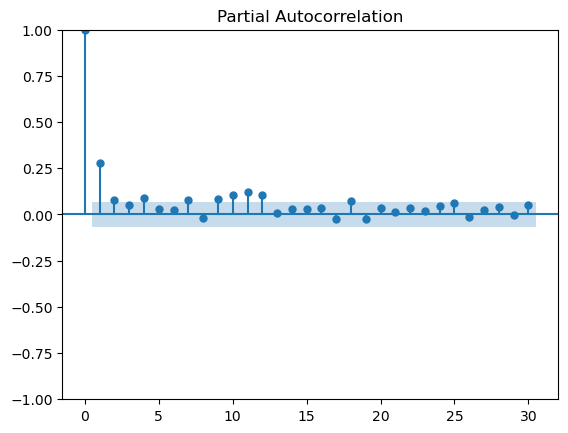

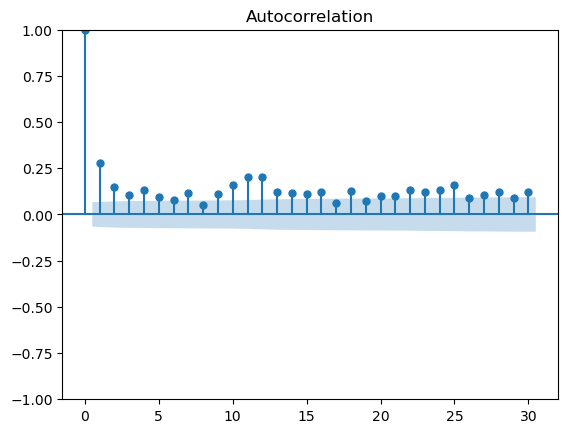

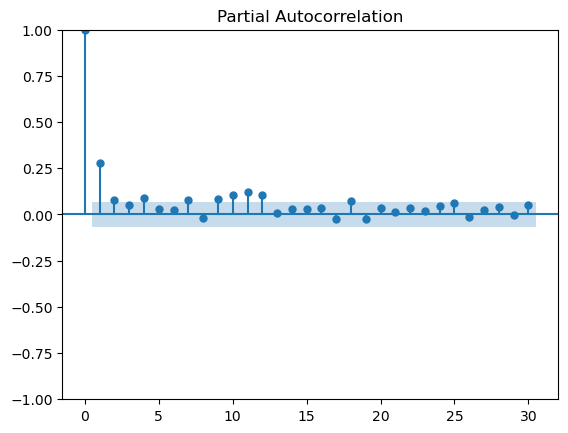

In [212]:
plot_acf(data_tornado_monthly_deperiodized)
plot_pacf(data_tornado_monthly_deperiodized)

<Axes: xlabel='date'>

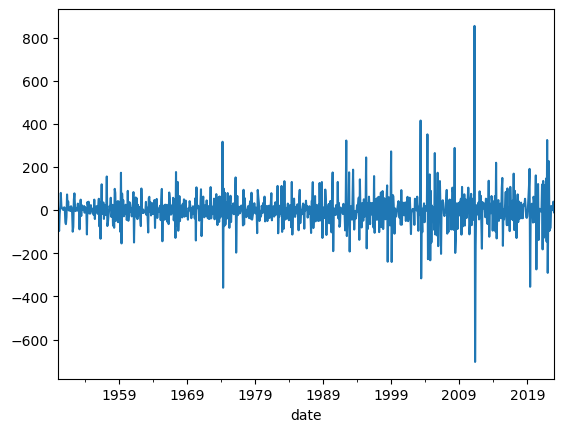

In [213]:
# detrend the data by taking differences
data_tornado_monthly_deperiodized_detrended = data_tornado_monthly_deperiodized.diff().dropna()
data_tornado_monthly_deperiodized_detrended.plot()

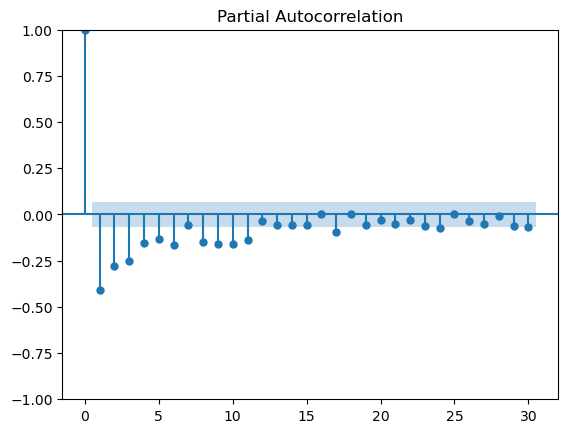

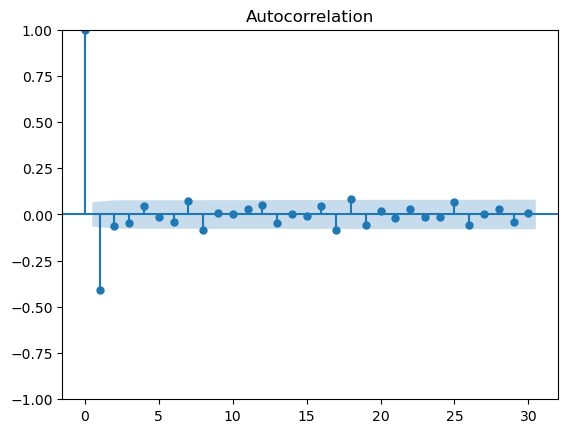

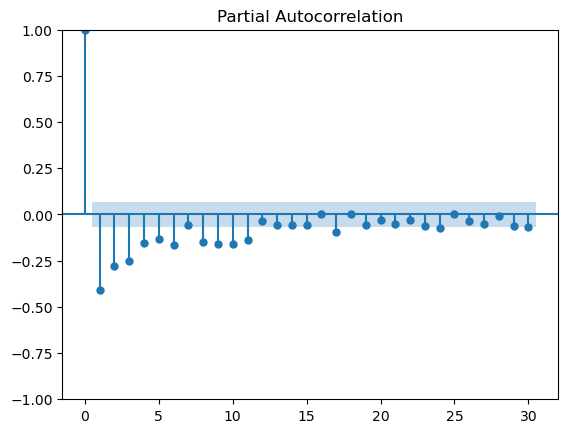

In [214]:
plot_acf(data_tornado_monthly_deperiodized_detrended)
plot_pacf(data_tornado_monthly_deperiodized_detrended)

In [215]:
#instead, try deperiodizing the data by subtracting each month by the number of tornados in the month 12 months before
data_tornado_monthly_deperiodized_2 = data_tornado_monthly - data_tornado_monthly.shift(12).fillna(0)

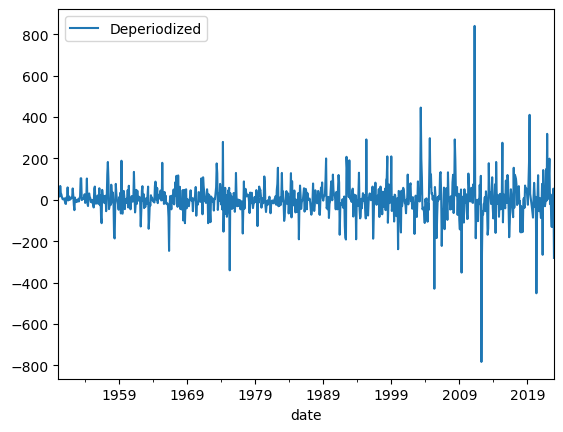

In [216]:
data_tornado_monthly_deperiodized_2.plot()
# data_tornado_monthly.plot()
plt.legend(['Deperiodized', 'Data', 'Interpolation'])


In [217]:
def get_monthly_tornadoes_for_county(data, geoid):
    county_data = data[data['GEOID'] == geoid]
    date_tornado_copy = county_data.copy()
    date_tornado_copy['date'] = pd.to_datetime(county_data['date'], format=date_format)
    county_data_monthly = date_tornado_copy.set_index('date').resample('ME').size()
    return county_data_monthly


def get_avg_num_tornadoes_per_month(data, geoid):
    county_data = data[data['GEOID'] == geoid]
    avg_num_tornadoes_per_month = county_data.groupby('mo').size() / num_years
    return avg_num_tornadoes_per_month

def get_monthly_period(data, geoid):
    avg_num_tornadoes_per_month = get_avg_num_tornadoes_per_month(data, geoid)

    x = avg_num_tornadoes_per_month.index.astype(int)
    y = avg_num_tornadoes_per_month.values

    #artificially moving the first value to the end to make the interpolation smoother
    y[-1] = y[0]
    P = spi.CubicSpline(x, y, bc_type='periodic')
    return P

def plot_period(P, avg_num_tornadoes_per_month):
    x = np.linspace(0, 24, 100)

    plt.scatter(avg_num_tornadoes_per_month.index, avg_num_tornadoes_per_month.values)
    plt.plot(x, P(x))
    plt.xlabel('Month')
    plt.ylabel('Average Number of Tornadoes')
    plt.title('Average Number of Tornadoes per month in the US')
    plt.legend(['Data', 'Interpolation'])

def deperiodize(P, data_monthly):
    samples = np.arange(1, data_monthly.size+1)

    #de-periodize the data
    # treat 1 as January
    data_monthly_deperiodized = data_monthly - P(samples % 12)
    return data_monthly_deperiodized

In [218]:
data_tornado['GEOID'].value_counts()
#look at counties 8123, 48201, 8121, 12099, 8001

GEOID
8123     288
48201    249
8121     183
12099    181
8001     172
        ... 
2261       1
54021      1
8097       1
36073      1
54069      1
Name: count, Length: 3057, dtype: int64

<Axes: xlabel='date'>

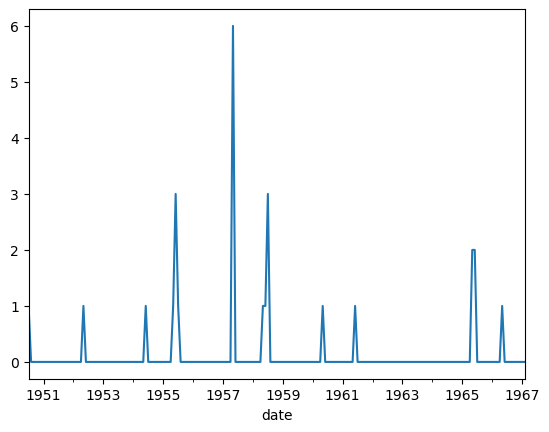

In [219]:
county_monthly = get_monthly_tornadoes_for_county(data_tornado, 8123)
county_monthly[:200].plot()

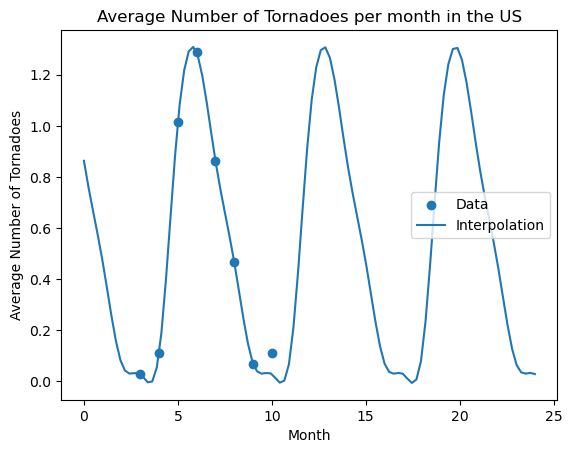

In [220]:
county_period_func = get_monthly_period(data_tornado, 8123)
avg_tornadoes_per_month = get_avg_num_tornadoes_per_month(data_tornado, 8123)
plot_period(county_period_func, avg_tornadoes_per_month)


In [221]:
avg_tornadoes_per_month

mo
3     0.027397
4     0.109589
5     1.013699
6     1.287671
7     0.863014
8     0.465753
9     0.068493
10    0.109589
dtype: float64

<Axes: xlabel='date'>

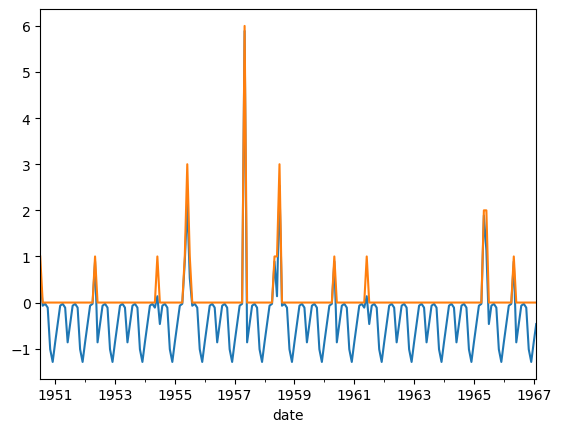

In [222]:
deperiodized_county = deperiodize(county_period_func, county_monthly)
deperiodized_county[:200].plot()
county_monthly[:200].plot()

# OLS

In [251]:
data_tornados_by_county_time = data_tornado.groupby('GEOID')[['yr', 'mo']].value_counts()

#convert indices to columns
data_tornados_by_county_time = data_tornados_by_county_time.reset_index()
data_tornados_by_county_time['yr_mo'] = (data_tornados_by_county_time['yr'] + data_tornados_by_county_time['mo']/12)
data_tornados_by_county_time

,GEOID,yr,mo,count,yr_mo
0,1001,2011,4,6,2011.333333
1,1001,2005,7,3,2005.583333
2,1001,1982,1,2,1982.083333
3,1001,2004,11,2,2004.916667
4,1001,2019,1,2,2019.083333
...,...,...,...,...,...
58630,72099,2011,8,1,2011.666667
58631,72127,2000,2,1,2000.166667
58632,72127,2017,3,1,2017.250000
58633,72141,1959,7,1,1959.583333


In [252]:
#create dummy variables for the months
data_tornado_month_dummies = pd.get_dummies(data_tornados_by_county_time, columns=['mo'])
data_tornado_month_dummies.head()

,GEOID,yr,count,yr_mo,mo_1,mo_2,mo_3,mo_4,mo_5,mo_6,mo_7,mo_8,mo_9,mo_10,mo_11,mo_12
0,1001,2011,6,2011.333333,False,False,False,True,False,False,False,False,False,False,False,False
1,1001,2005,3,2005.583333,False,False,False,False,False,False,True,False,False,False,False,False
2,1001,1982,2,1982.083333,True,False,False,False,False,False,False,False,False,False,False,False
3,1001,2004,2,2004.916667,False,False,False,False,False,False,False,False,False,False,True,False
4,1001,2019,2,2019.083333,True,False,False,False,False,False,False,False,False,False,False,False


     yr        yr_mo   mo_1   mo_2   mo_3   mo_4   mo_5   mo_6   mo_7   mo_8  \
0  2011  2011.333333  False  False  False   True  False  False  False  False   
1  2005  2005.583333  False  False  False  False  False  False   True  False   
2  1982  1982.083333   True  False  False  False  False  False  False  False   
3  2004  2004.916667  False  False  False  False  False  False  False  False   
4  2019  2019.083333   True  False  False  False  False  False  False  False   

    mo_9  mo_10  mo_11  mo_12  
0  False  False  False  False  
1  False  False  False  False  
2  False  False  False  False  
3  False  False   True  False  
4  False  False  False  False  


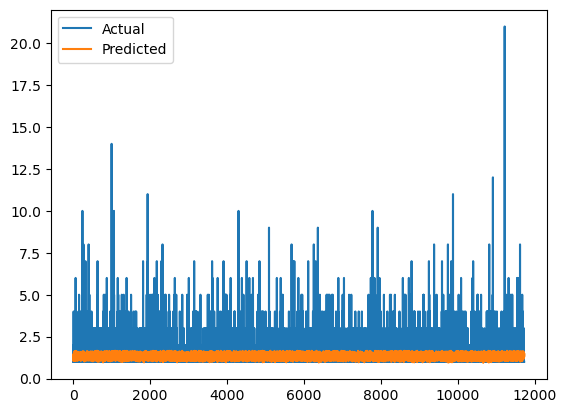

In [253]:
#fit a linear regression model to the data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data_tornado_month_dummies.drop(columns=['GEOID', 'count'])
print(X.head())
y = data_tornado_month_dummies['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

#plot actual counts and predicted counts
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])






Text(0.5, 1.0, 'Residuals vs Counts')

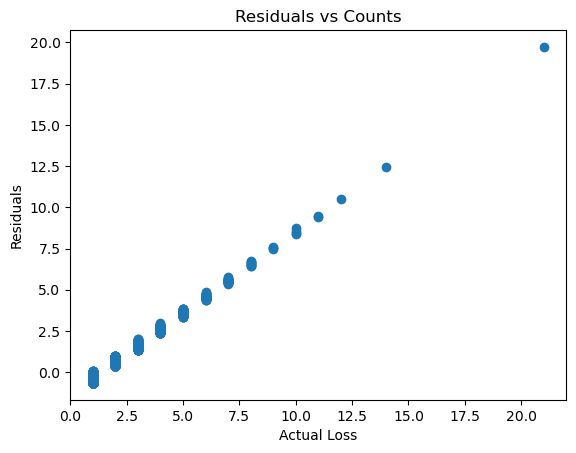

In [254]:
#plot residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Loss')
plt.ylabel('Residuals')
plt.title('Residuals vs Counts')

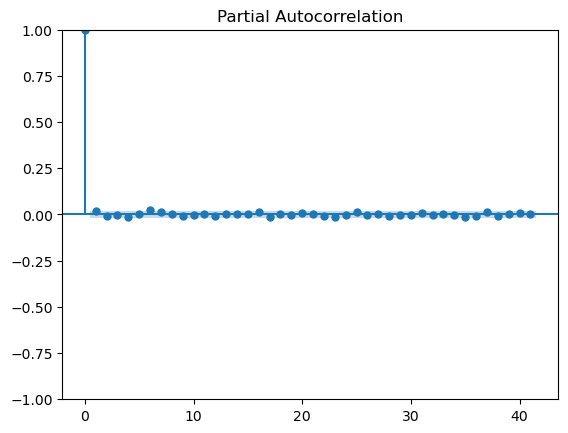

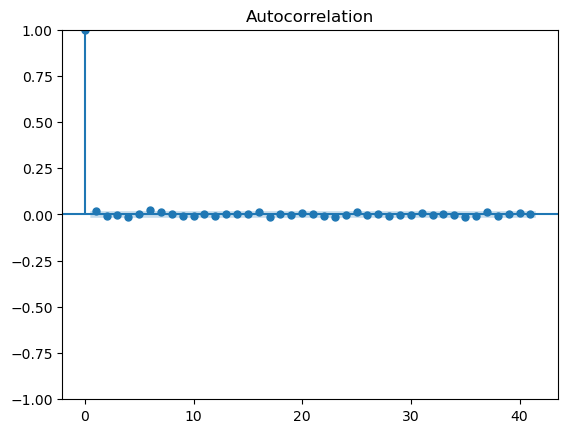

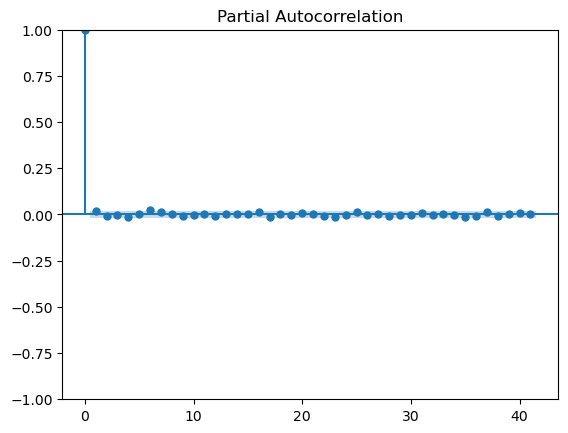

In [255]:
#plot acf and pacf
plot_acf(residuals)
plot_pacf(residuals)